Team Jedward Datathon project!

In [60]:
#import values
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [61]:
#importing csv files to dataframes
customers_df = pd.read_csv("the_data/olist_customers_dataset.csv")
geolocation_df = pd.read_csv("the_data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("the_data/olist_order_items_dataset.csv")
order_payment_df = pd.read_csv("the_data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("the_data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("the_data/olist_orders_dataset.csv")
products_df = pd.read_csv("the_data/olist_products_dataset.csv")
sellers_df = pd.read_csv("the_data/olist_sellers_dataset.csv")

In [62]:
#Creating a dataframe of the duplicate customers (Customers that have made multiple orders)
duplicate_customer_df = pd.DataFrame()
duplicate_customer_df = customers_df[customers_df.duplicated(subset=['customer_unique_id'], keep=False)]
duplicate_customer_df = duplicate_customer_df.sort_values(by='customer_unique_id', ascending=False)
duplicate_customer_csv_data = duplicate_customer_df.to_csv('cleaned_data/duplicate_customer_dataset.csv', index = False)
duplicate_customer_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12133,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
...,...,...,...,...,...
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


In [63]:
#Cutting down geolocation data to just differing zip codes (rather than having many many pieces geolcation data per zip)
geolocation_df = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
geolocation_csv_data = geolocation_df.to_csv('cleaned_data/geolocation_dataset_cleaned.csv', index = False)

In [64]:
#Checking for null and duplicate values in the order items dataframe
print(order_items_df.isnull().sum())
print(order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


In [65]:
#Checking for null and duplicate values in the order payment dataframe
print(order_payment_df.isnull().sum())
print(order_payment_df.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
0


In [66]:
#Filling empty review scores with the mean of the other review scores
order_reviews_df['review_score'] = order_reviews_df['review_score'].fillna(order_reviews_df['review_score'].mean())
#Filling empty review messages with 0 (will make it easy to keep track of)
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna(0)

#Checking for null and duplicate values in the order items dataframe
print(order_reviews_df.isnull().sum())
print(order_reviews_df.duplicated().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64
0


In [67]:
#Fill empty data with 0(was all data about dates and time which we didn't care about for this dataset)
orders_df = orders_df.fillna(0)

print(orders_df.isnull().sum())

#Check no order id is a duplicate
print(orders_df.duplicated(subset=['order_id']).sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
0


In [68]:
#Filled empty category names with 'misc'
products_df['product_category_name'] = products_df['product_category_name'].fillna('misc')

#Filled empty product photo quantities with 0
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)

products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [69]:
#Checking there are no empty values
print(sellers_df.isnull().sum())

#Making sure every seller id is unique
print(sellers_df.duplicated(subset=['seller_id']).sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
0


In [70]:
#Mergine dataframes for the duplicate customers
combined_df = pd.merge(duplicate_customer_df, orders_df[['customer_id', 'order_id']], on = "customer_id", how = "outer")

combined_df.dropna()

combined_df = pd.merge(combined_df, order_items_df[['order_id', 'product_id', 'price']], on ="order_id", how = "outer")

combined_df = pd.merge(combined_df, products_df[['product_id', 'product_category_name', 'product_photos_qty']], on ="product_id", how = "outer")

combined_df.dropna()

combined_df = pd.merge(combined_df, order_reviews_df[['order_id', 'review_score', 'review_comment_message']], on ="order_id", how = "outer")

combined_df['review_score'] = combined_df['review_score'].fillna(combined_df['review_score'].mean())

combined_df['review_comment_message'] = combined_df['review_comment_message'].fillna(0)

combined_df = combined_df.dropna() 

combined_df

#combined dataframe for contains, customer id, unique customer id, customer zip code, customer city, customer state, order id, product id, price, product category, product photo qty, review score, and review message


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,price,product_category_name,product_photos_qty,review_score,review_comment_message
0,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,ebe76afae9242fc70b0b807b78f17adb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,baratheon e uma das melhores lojas.
1,f8ead8fa77e496442ea34c58340a7f5a,c6df3869c263531ebd51f0454a353605,96020.0,pelotas,RS,99ed5bfea4c7e7191a2412698fc7abbb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,0
2,d102ebbcb63b6d1806d5482c59d732d4,374fcbbfcf189ae177b2f955f9e74b3d,18275.0,tatui,SP,6b1d0be1d67ed935bcaab8aa908f2b3e,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,Valeu a pena a compra. Fica muito bonito na cama
14,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,39a0e2f723def2e12a51e963006c9242,18fc07433ae4bcd5a8bdf658b2c6e40d,37.18,cama_mesa_banho,1.0,1.0,Meu produto não certo. Insatisfeita\r\n
15,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340.0,barra bonita,SP,fd216c435fda2be27c92920a5e5dba82,fd3a4121e687a6b84e7af92606d5d718,24.90,fashion_bolsas_e_acessorios,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49511,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595.0,brasilia,DF,cea3e6c11eb60acb9d8d4d51694832f8,f89cd865cac300a9bf1320dd8f0fa223,11.55,eletronicos,1.0,4.0,0
49525,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731.0,salvador,BA,2cfc79d9582e9135c0a9b61fa60e6b21,6bd248f93425ceeb625a8a97e2404112,59.90,papelaria,1.0,1.0,0
49547,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055.0,maceio,AL,90ae229a4addcfead792e2564554f09c,b0961721fd839e9982420e807758a2a6,59.90,ferramentas_jardim,2.0,1.0,Infelizmente o produto ainda não chegou. Houve...
49659,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220.0,nova iguacu,RJ,08204559bebd39e09ee52dcb56d8faa2,a2bd2eae20998a24c22b110334928b02,87.90,malas_acessorios,1.0,5.0,"Maravilhoso,amei e chegou antes do prazo !"


(array([0.2134124 , 0.05234644, 0.08680479, 0.64743637]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

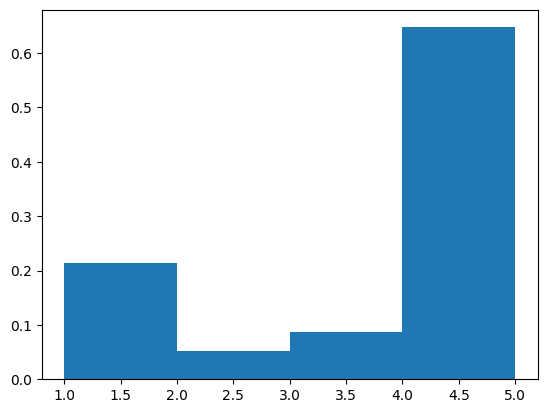

In [81]:
#Analyzing what percentage of total reviews are each number for ratings that have a review
order_reviews_filtered_df = order_reviews_df[order_reviews_df['review_comment_message'] != 0]
plt.hist(order_reviews_filtered_df['review_score'], density = True, bins=[1,2,3,4,5])

(array([0.05749223, 0.02158909, 0.09918966, 0.28254674, 0.78918228]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

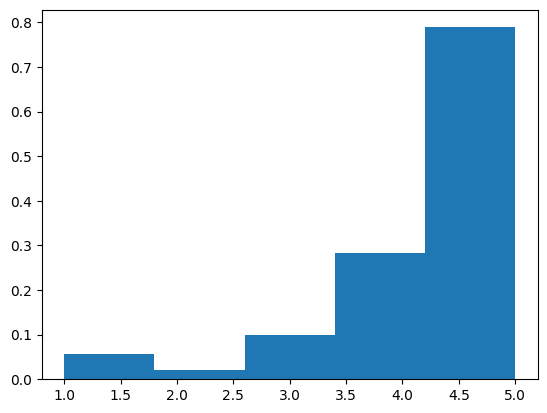

In [82]:
#Analyzing what percentage of total reviews are each number for ratings that don't have a review
order_noreviews_filtered_df = order_reviews_df[order_reviews_df['review_comment_message'] == 0]
plt.hist(order_noreviews_filtered_df['review_score'], density = True, bins=5)

'\ncama_mesa_banho                  11270\nbeleza_saude                      9727\nesporte_lazer                     8700\nmoveis_decoracao                  8415\ninformatica_acessorios            7894\n'

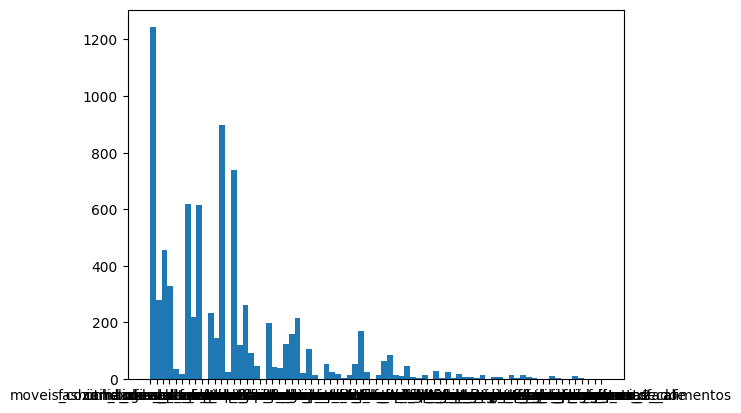

In [79]:
list = []
for i in combined_df['product_category_name']:
    if i != 0:
        list.append(i)
plt.hist(list, bins = 78)
plt.show

combined_df['product_category_name'].value_counts()

"""
Most Bought Categories in Total
cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
"""

In [86]:
seller_product_info_df=pd.merge(products_df[['product_id', 'product_category_name']], order_items_df[['seller_id','product_id','price']], on ="product_id", how = "outer")
seller_product_info_df=seller_product_info_df.sort_values(by='seller_id', ascending=False)
seller_info_df=pd.DataFrame()
seller_info_df['seller_id']=seller_product_info_df['seller_id'].drop_duplicates()
seller_info_df['most_popular_category']='None'

sellers=[]
for i in seller_info_df['seller_id']:
    sellers.append(i)

most_pop_dict={}
for i in sellers:
    most_pop_dict[i]=[]

for i in seller_product_info_df.index:
    most_pop_dict[seller_product_info_df['seller_id'][i]].append(seller_product_info_df['product_category_name'][i])
import statistics

for i in seller_info_df.index:
    seller_info_df['most_popular_category'][i]=statistics.mode(most_pop_dict[seller_product_info_df['seller_id'][i]])
seller_info_df

,seller_id,most_popular_category
84422,ffff564a4f9085cd26170f4732393726,automotivo
32641,fffd5413c0700ac820c7069d66d98c89,utilidades_domesticas
104809,ffeee66ac5d5a62fe688b9d26f83f534,eletrodomesticos
28444,ffdd9f82b9a447f6f8d4b91554cc7dd3,utilidades_domesticas
108649,ffcfefa19b08742c5d315f2791395ee5,livros_interesse_geral
...,...,...
39348,003554e2dce176b5555353e4f3555ac8,misc
105490,002100f778ceb8431b7a1020ff7ab48f,moveis_decoracao
21314,001e6ad469a905060d959994f1b41e4f,esporte_lazer
17624,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim


In [57]:
#Calculating the Average Rating of every item
import statistics

rating_df = pd.DataFrame()
rating_df = pd.merge(order_reviews_df[['order_id', 'review_score', 'review_comment_message']], order_items_df[['order_id', 'product_id']], on = "order_id", how="outer")

rating_df['review_score'] = rating_df['review_score'].fillna(rating_df['review_score'].median())
rating_df['review_comment_message'] = rating_df['review_comment_message'].fillna(0)

rating_df = rating_df[['review_score', 'review_comment_message', 'product_id']]

for i in rating_df.index:
    if rating_df['review_score'][i]==1 and rating_df['review_comment_message'][i]!=0:
        rating_df['review_score'][i]=0


products = []
for i in rating_df['product_id'].drop_duplicates():
    products.append(i)

avg_rating_dict={}
for i in products:
    avg_rating_dict[i]= []


for i in rating_df.index:
    avg_rating_dict[rating_df['product_id'][i]].append(rating_df['review_score'][i])

averages=[]
amounts=[]

for i in avg_rating_dict:
    averages.append(statistics.mean(avg_rating_dict[i]))
    amounts.append(len(avg_rating_dict[i]))

avg_rating_df = pd.DataFrame(columns=avg_rating_dict.keys())

avg_rating_df.loc[0] = averages
avg_rating_df.loc[1] = amounts

avg_rating_df

C:\Users\jason\AppData\Local\Temp\ipykernel_25552\88843809.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['review_score'][i]=0


,fd25ab760bfbba13c198fa3b4f1a0cd3,be0dbdc3d67d55727a65d4cd696ca73c,d1c427060a0f73f6b889a5c7c61f2ac4,52c80cedd4e90108bf4fa6a206ef6b03,3880d25d502b15b1de6fddc42ad1d67a,c45d02cc82cd779835094de9b29272cb,4e3550b4ebca5e32ccc3d32b3470e31f,3152a0c0d93abeec99e4a6169aecc88b,306e6b5dda3397e4a9312f94d82565b5,35afc973633aaeb6b877ff57b2793310,...,6ad3413ad491b857999157ee4fc403d9,54caa022e792f1ce31d4a656cecaa802,52bd2502183574fc11a434d5d215a4cd,bb936e22237d5ec143263050cd705132,d59267ac2ab76cbed276481ceb149023,31129af5d35d9ff3136470ea2305705d,9c74c26ab807a4a6a5c1dd3c0a112d76,3324465da0373199261538db9d035411,be4d4aacf88585bba5689cbc3393e0cc,69c590f7ffc7bf8db97190b6cb6ed62e
0,4.5,2.740741,4.119534,4.110169,5.0,1.0,1.0,5.0,3.5,3.676647,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,4.0,27.000000,343.000000,118.000000,3.0,3.0,1.0,1.0,4.0,167.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [85]:
combined_df = combined_df[['customer_unique_id', 'product_id', 'price', 'product_category_name', 'review_score']]
combined_df

,customer_unique_id,product_id,price,product_category_name,review_score
0,ffe254cc039740e17dd15a5305035928,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,5.0
1,c6df3869c263531ebd51f0454a353605,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,5.0
2,374fcbbfcf189ae177b2f955f9e74b3d,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,5.0
14,ffe254cc039740e17dd15a5305035928,18fc07433ae4bcd5a8bdf658b2c6e40d,37.18,cama_mesa_banho,1.0
15,ff922bdd6bafcdf99cb90d7f39cea5b3,fd3a4121e687a6b84e7af92606d5d718,24.90,fashion_bolsas_e_acessorios,5.0
...,...,...,...,...,...
49511,00a39521eb40f7012db50455bf083460,f89cd865cac300a9bf1320dd8f0fa223,11.55,eletronicos,4.0
49525,0058f300f57d7b93c477a131a59b36c3,6bd248f93425ceeb625a8a97e2404112,59.90,papelaria,1.0
49547,004b45ec5c64187465168251cd1c9c2f,b0961721fd839e9982420e807758a2a6,59.90,ferramentas_jardim,1.0
49659,004288347e5e88a27ded2bb23747066c,a2bd2eae20998a24c22b110334928b02,87.90,malas_acessorios,5.0
